In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

# Treino Violência

In [ ]:
DATASET_TEST_PATH = '/content/drive/MyDrive/AIRTLab/test/'

DATASET_TRAIN_PATH = '/content/drive/MyDrive/AIRTLab/train/'

TARGET_SIZE = (120,160)

DESIRED_ACCURACY = 0.995

In [ ]:
def violence_test_dataset():
    train_datagen = ImageDataGenerator(rescale = 1.0/255.)

    return train_datagen.flow_from_directory(DATASET_TEST_PATH,
                                             batch_size=32,
                                             class_mode='categorical',
                                             target_size=TARGET_SIZE)

def violence_train_dataset():
    train_datagen = ImageDataGenerator(rescale = 1.0/255.)

    return train_datagen.flow_from_directory(DATASET_TRAIN_PATH,
                                             batch_size = 32,
                                             class_mode = 'categorical',
                                             target_size =TARGET_SIZE)

In [ ]:
metrics = [ 'accuracy']

def load_inceptionv3():
    pre_trained_model = InceptionV3(input_shape = (120, 160, 3),
                                    include_top = False)

    for layer in pre_trained_model.layers:
        layer.trainable = False

    last_layer = pre_trained_model.get_layer('mixed10')
    print('last layer output shape: ', last_layer.output_shape)
    last_output = last_layer.output

    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(2, activation='softmax')(x)

    model = Model(pre_trained_model.input, x)
    model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=metrics)

    return model

In [ ]:
def load_mobilenetv2():
    pre_trained_model = MobileNetV2(input_shape = (120, 160, 3),
                                    include_top = False)

    for layer in pre_trained_model.layers:
        layer.trainable = False

    last_layer = pre_trained_model.get_layer('out_relu')
    print('last layer output shape: ', last_layer.output_shape)
    last_output = last_layer.output

    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(2, activation='softmax')(x)

    model = Model(pre_trained_model.input, x)
    model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=metrics)

    return model

In [ ]:
def load_resnet152v2():
    pre_trained_model = ResNet152V2(input_shape = (120, 160, 3),
                                    include_top = False)

    for layer in pre_trained_model.layers:
        layer.trainable = False

    last_layer = pre_trained_model.get_layer('post_bn')
    last_output = last_layer.output

    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(2, activation='softmax')(x)

    model = Model(pre_trained_model.input, x)
    model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=metrics)

    return model

In [ ]:
def load_vgg16():
    pre_trained_model = VGG16(input_shape = (120, 160, 3),
                                    include_top = False)

    for layer in pre_trained_model.layers:
        layer.trainable = False

    last_layer = pre_trained_model.get_layer('block5_pool')
    last_output = last_layer.output

    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(2, activation='softmax')(x)

    model = Model(pre_trained_model.input, x)
    model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=metrics)

    return model

In [ ]:
class accCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True
    elif(epoch == 10 and logs.get('accuracy')<=0.75):
      print("\nModel did not surpass 75% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
violence_model_inception = load_inceptionv3()
violence_model_mobilenet = load_mobilenetv2()
violence_model_resnet = load_resnet152v2()
violence_model_vgg = load_vgg16()

87910968/87910968 [==============================] - 3s 0us/step


last layer output shape:  (None, 2, 3, 2048)
9406464/9406464 [==============================] - 1s 0us/step
last layer output shape:  (None, 4, 5, 1280)
58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
history_inception = violence_model_inception.fit(
    violence_train_dataset(),
    epochs=40,
    batch_size=32,
    validation_data=violence_test_dataset(),
    callbacks=[accCallback()]
)

Found 2926 images belonging to 2 classes.
Found 1252 images belonging to 2 classes.
Epoch 1/40
92/92 [==============================] - 1474s 16s/step - loss: 1.1264 - accuracy: 0.8178 - val_loss: 0.0904 - val_accuracy: 0.9768
Epoch 2/40
92/92 [==============================] - 63s 685ms/step - loss: 0.1452 - accuracy: 0.9586 - val_loss: 0.6701 - val_accuracy: 0.7875
Epoch 3/40
92/92 [==============================] - 62s 671ms/step - loss: 0.1437 - accuracy: 0.9716 - val_loss: 0.0276 - val_accuracy: 0.9928
Epoch 4/40
92/92 [==============================] - 61s 666ms/step - loss: 0.1024 - accuracy: 0.9785 - val_loss: 0.0235 - val_accuracy: 0.9944
Epoch 5/40
92/92 [==============================] - 61s 667ms/step - loss: 0.0462 - accuracy: 0.9891 - val_loss: 0.0272 - val_accuracy: 0.9928
Epoch 6/40
92/92 [==============================] - 63s 685ms/step - loss: 0.0463 - accuracy: 0.9887 - val_loss: 0.0363 - val_accuracy: 0.9856
Epoch 7/40
92/92 [==============================] - 61s 66

In [ ]:
pd.DataFrame.from_dict(history_inception.history).to_csv('inception_history.csv',index=False)

In [ ]:
history_mobilenet = violence_model_mobilenet.fit(
    violence_train_dataset(),
    epochs=40,
    batch_size=32,
    validation_data=violence_test_dataset(),
    callbacks=[accCallback()]
)

Found 2926 images belonging to 2 classes.
Found 1252 images belonging to 2 classes.
Epoch 1/40
92/92 [==============================] - 66s 684ms/step - loss: 1.3268 - accuracy: 0.8575 - val_loss: 0.0819 - val_accuracy: 0.9673
Epoch 2/40
92/92 [==============================] - 61s 661ms/step - loss: 0.1662 - accuracy: 0.9621 - val_loss: 0.0254 - val_accuracy: 0.9912
Epoch 3/40
92/92 [==============================] - 63s 690ms/step - loss: 0.2105 - accuracy: 0.9716 - val_loss: 0.0818 - val_accuracy: 0.9752
Epoch 4/40
92/92 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 0.9986
Reached 99.5% accuracy so cancelling training!
92/92 [==============================] - 60s 659ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.0085 - val_accuracy: 0.9968


In [ ]:
pd.DataFrame.from_dict(history_mobilenet.history).to_csv('mobilenet_history.csv',index=False)

In [ ]:
history_resnet = violence_model_resnet.fit(
    violence_train_dataset(),
    epochs=40,
    batch_size=32,
    validation_data=violence_test_dataset(),
    callbacks=[accCallback()]
)

Found 2926 images belonging to 2 classes.
Found 1252 images belonging to 2 classes.
Epoch 1/40
92/92 [==============================] - 78s 734ms/step - loss: 21.6695 - accuracy: 0.7546 - val_loss: 1.0171 - val_accuracy: 0.9361
Epoch 2/40
92/92 [==============================] - 63s 685ms/step - loss: 4.0592 - accuracy: 0.8811 - val_loss: 12.5617 - val_accuracy: 0.6901
Epoch 3/40
92/92 [==============================] - 64s 702ms/step - loss: 1.5214 - accuracy: 0.9252 - val_loss: 0.3982 - val_accuracy: 0.9665
Epoch 4/40
92/92 [==============================] - 63s 688ms/step - loss: 0.7319 - accuracy: 0.9580 - val_loss: 0.3210 - val_accuracy: 0.9601
Epoch 5/40
92/92 [==============================] - 64s 695ms/step - loss: 0.6409 - accuracy: 0.9586 - val_loss: 0.2704 - val_accuracy: 0.9665
Epoch 6/40
92/92 [==============================] - 64s 695ms/step - loss: 0.4263 - accuracy: 0.9658 - val_loss: 4.6591 - val_accuracy: 0.7772
Epoch 7/40
92/92 [==============================] - 62s 

In [ ]:
pd.DataFrame.from_dict(history_resnet.history).to_csv('resnet_history.csv',index=False)

In [ ]:
history_vgg = violence_model_vgg.fit(
    violence_train_dataset(),
    epochs=40,
    batch_size=32,
    validation_data=violence_test_dataset(),
    callbacks=[accCallback()]
)

Found 2926 images belonging to 2 classes.
Found 1252 images belonging to 2 classes.
Epoch 1/40
92/92 [==============================] - 68s 696ms/step - loss: 0.4084 - accuracy: 0.8291 - val_loss: 0.2448 - val_accuracy: 0.8890
Epoch 2/40
92/92 [==============================] - 62s 679ms/step - loss: 0.1289 - accuracy: 0.9580 - val_loss: 0.1356 - val_accuracy: 0.9417
Epoch 3/40
92/92 [==============================] - 64s 696ms/step - loss: 0.0671 - accuracy: 0.9785 - val_loss: 0.0339 - val_accuracy: 0.9928
Epoch 4/40
92/92 [==============================] - 62s 672ms/step - loss: 0.0438 - accuracy: 0.9846 - val_loss: 0.0240 - val_accuracy: 0.9928
Epoch 5/40
92/92 [==============================] - 62s 678ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.0201 - val_accuracy: 0.9944
Epoch 6/40
92/92 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9983
Reached 99.5% accuracy so cancelling training!
92/92 [==============================] - 63s 684ms/step - lo

In [ ]:
pd.DataFrame.from_dict(history_vgg.history).to_csv('vgg_history.csv',index=False)

In [ ]:
violence_model_inception.save('/content/drive/MyDrive/Documentos/inception_model.keras')

In [ ]:
violence_model_resnet.save('/content/drive/MyDrive/Documentos/resnet_model.keras')

In [ ]:
violence_model_mobilenet.save('/content/drive/MyDrive/Documentos/mobilenet_model.keras')

In [ ]:
violence_model_vgg.save('/content/drive/MyDrive/Documentos/vgg_model.keras')

In [ ]:
modelo  = tf.keras.models.load_model('/content/mobilenet_model.keras')

# Treino Gênero

## Obtendo Dataset

In [ ]:
!mkdir ~/.pa-100k

In [ ]:
from zipfile import ZipFile

file = '/content/drive/MyDrive/PA-100K/annotation.zip'

with ZipFile(file, 'r') as zip:
  zip.printdir()

  print('extracting annotations...')
  zip.extractall(path='/content/pa-100k/')
  print('Done!')

File Name                                             Modified             Size
annotation.mat                                 2017-07-26 13:11:32       579061
README.txt                                     2017-07-26 13:35:52          638
extracting annotations...
Done!


In [ ]:
import scipy.io
import pandas as pd
import numpy as np

mat_data = scipy.io.loadmat('/content/pa-100k/annotation.mat')

train_images_name = mat_data['train_images_name']
val_images_name = mat_data['val_images_name']
test_images_name = mat_data['test_images_name']

train_label = mat_data['train_label']
val_label = mat_data['val_label']
test_label = mat_data['test_label']

attributes = mat_data['attributes']

attribute_names = [name.item() for name in attributes.flatten()]

train_df = pd.DataFrame(data=train_label, columns=attribute_names)
val_df = pd.DataFrame(data=val_label, columns=attribute_names)
test_df = pd.DataFrame(data=test_label, columns=attribute_names)

train_df.to_csv('/content/pa-100k/train_data.csv', index=False)
val_df.to_csv('/content/pa-100k/val_data.csv', index=False)
test_df.to_csv('/content/pa-100k/test_data.csv', index=False)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Female              80000 non-null  uint8
 1   AgeOver60           80000 non-null  uint8
 2   Age18-60            80000 non-null  uint8
 3   AgeLess18           80000 non-null  uint8
 4   Front               80000 non-null  uint8
 5   Side                80000 non-null  uint8
 6   Back                80000 non-null  uint8
 7   Hat                 80000 non-null  uint8
 8   Glasses             80000 non-null  uint8
 9   HandBag             80000 non-null  uint8
 10  ShoulderBag         80000 non-null  uint8
 11  Backpack            80000 non-null  uint8
 12  HoldObjectsInFront  80000 non-null  uint8
 13  ShortSleeve         80000 non-null  uint8
 14  LongSleeve          80000 non-null  uint8
 15  UpperStride         80000 non-null  uint8
 16  UpperLogo           80000 non-null  uint

In [ ]:
data_file = '/content/drive/MyDrive/PA-100K/data.zip'

with ZipFile(data_file, 'r') as zip:
  zip.printdir()

  print('extracting data...')
  zip.extractall(path='/content/pa-100k/')
  print('Done!')

A saída de streaming foi truncada nas últimas 5000 linhas.
release_data/release_data/030742.jpg           2017-07-26 10:30:44         3708
release_data/release_data/030743.jpg           2017-07-26 10:28:42         2163
release_data/release_data/030744.jpg           2017-07-26 10:06:36         6339
release_data/release_data/030745.jpg           2017-07-26 10:33:10        11374
release_data/release_data/030746.jpg           2017-07-26 10:05:48         3914
release_data/release_data/030747.jpg           2017-07-26 10:09:16         1472
release_data/release_data/030748.jpg           2017-07-26 10:09:10         4083
release_data/release_data/030749.jpg           2017-07-26 10:07:26         2976
release_data/release_data/030750.jpg           2017-07-26 10:18:44         5121
release_data/release_data/030751.jpg           2017-07-26 10:15:44         4450
release_data/release_data/030752.jpg           2017-07-26 10:30:56         2643
release_data/release_data/030753.jpg           2017-07-26 10:

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



A saída de streaming foi truncada nas últimas 5000 linhas.
release_data/release_data/095003.jpg           2017-07-26 10:09:16         5480
release_data/release_data/095004.jpg           2017-07-26 10:10:40         3735
release_data/release_data/095005.jpg           2017-07-26 10:17:16         3292
release_data/release_data/095006.jpg           2017-07-26 10:15:04         2246
release_data/release_data/095007.jpg           2017-07-26 10:06:28         6155
release_data/release_data/095008.jpg           2017-07-26 10:34:56         3453
release_data/release_data/095009.jpg           2017-07-26 10:29:08         4931
release_data/release_data/095010.jpg           2017-07-26 10:19:44         4246
release_data/release_data/095011.jpg           2017-07-26 10:34:24         3286
release_data/release_data/095012.jpg           2017-07-26 10:20:58         5741
release_data/release_data/095013.jpg           2017-07-26 10:34:52         3637
release_data/release_data/095014.jpg           2017-07-26 10:

In [ ]:
image_names = [f'{i + 1:06d}.jpg' for i in range(len(test_df)+len(train_df)+len(val_df))]
image_names[0:10]

['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg',
 '000010.jpg']

In [ ]:
image_names_train = [f'{i + 1:06d}.jpg' for i in range(len(train_df))]
image_names_val = [f'{i + 1 + len(train_images_name):06d}.jpg' for i in range(len(val_df))]
image_names_test = [f'{i + 1 + len(train_images_name) + len(val_images_name):06d}.jpg' for i in range(len(test_df))]

In [ ]:
train_df.head()

,Female,AgeOver60,Age18-60,AgeLess18,Front,Side,Back,Hat,Glasses,HandBag,...,UpperLogo,UpperPlaid,UpperSplice,LowerStripe,LowerPattern,LongCoat,Trousers,Shorts,Skirt&Dress,boots
0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
train_df['filename']= image_names_train
val_df['filename'] = image_names_val
test_df['filename'] = image_names_test

In [ ]:
train_df.set_index('filename',inplace=True)
val_df.set_index('filename',inplace=True)
test_df.set_index('filename',inplace=True)

In [ ]:
train_df.head()

,Female,AgeOver60,Age18-60,AgeLess18,Front,Side,Back,Hat,Glasses,HandBag,...,UpperLogo,UpperPlaid,UpperSplice,LowerStripe,LowerPattern,LongCoat,Trousers,Shorts,Skirt&Dress,boots
filename,,,,,,,,,,,,,,,,,,,,,
000001.jpg,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
000002.jpg,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
000003.jpg,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
000004.jpg,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
000005.jpg,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


## Teste Dataset

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
features = ['Female','Front','Back', 'Side','Trousers','Shorts', 'Skirt&Dress']
data_path = '/content/pa-100k/release_data/release_data/'

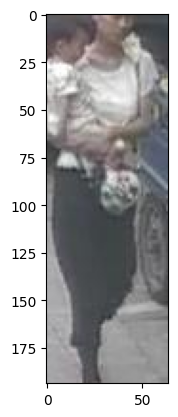

Female         1
Front          1
Back           0
Side           0
Trousers       1
Shorts         0
Skirt&Dress    0
Name: 000001.jpg, dtype: uint8

In [ ]:
picture = data_path + '000001.jpg'
img = mpimg.imread( picture )
imgplot = plt.imshow( img )
plt.show()
train_df.loc[picture.split('/')[-1]][features]

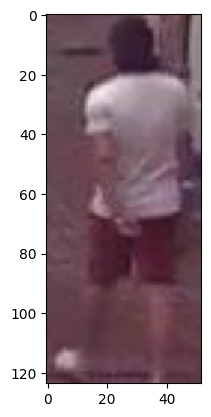

Female         0
Front          0
Back           1
Side           0
Trousers       0
Shorts         1
Skirt&Dress    0
Name: 000004.jpg, dtype: uint8

In [ ]:
picture = data_path + '000004.jpg'
img = mpimg.imread( picture )
imgplot = plt.imshow( img )
plt.show()
train_df.loc[picture.split('/')[-1]][features]

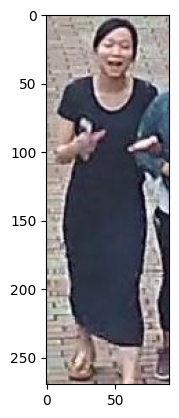

Female         1
Front          1
Back           0
Side           0
Trousers       0
Shorts         0
Skirt&Dress    1
Name: 080001.jpg, dtype: uint8

In [ ]:
picture = data_path + '080001.jpg'
img = mpimg.imread( picture )
imgplot = plt.imshow( img )
plt.show()
val_df.loc[picture.split('/')[-1]][features]

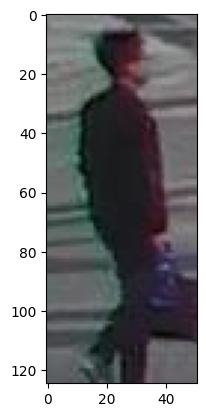

Female         0
Front          0
Back           0
Side           1
Trousers       1
Shorts         0
Skirt&Dress    0
Name: 090001.jpg, dtype: uint8

In [ ]:
picture = data_path + '090001.jpg'
img = mpimg.imread( picture )
imgplot = plt.imshow( img )
plt.show()
test_df.loc[picture.split('/')[-1]][features]

## Preparando Dataset

In [ ]:
gender_train = train_df[['Female']]
gender_val = val_df[['Female']]
gender_test = test_df[['Female']]

In [ ]:
gender_train.head()

,Female
filename,
000001.jpg,1
000002.jpg,0
000003.jpg,1
000004.jpg,0
000005.jpg,1


In [ ]:
def load_gender_dataset(df):
  data_generator = ImageDataGenerator(rescale = 1.0/255.)

  return data_generator.flow_from_dataframe(dataframe=df,
                                            directory='/content/pa-100k/release_data/release_data/',
                                            x_col='filename',
                                            y_col='Female',
                                            target_size=(120,80))

In [ ]:
gender_train = gender_train.reset_index()
gender_val = gender_val.reset_index()
gender_test = gender_test.reset_index()

In [ ]:
gender_train['Female'] = gender_train['Female'].map({1: 'Yes', 0: 'No'})
gender_val['Female'] = gender_val['Female'].map({1: 'Yes', 0: 'No'})
gender_test['Female'] = gender_test['Female'].map({1: 'Yes', 0: 'No'})

In [ ]:
gender_train.head()

,filename,Female
0,000001.jpg,Yes
1,000002.jpg,No
2,000003.jpg,Yes
3,000004.jpg,No
4,000005.jpg,Yes


In [ ]:
gender_train_dataset = load_gender_dataset(gender_train)
gender_val_dataset = load_gender_dataset(gender_val)
gender_test_dataset = load_gender_dataset(gender_test)

Found 80000 validated image filenames belonging to 2 classes.
Found 10000 validated image filenames belonging to 2 classes.
Found 10000 validated image filenames belonging to 2 classes.


## Treinamento Modelos

### Modelos

In [ ]:
metrics = [ 'accuracy']

def load_gender_inceptionv3():
    pre_trained_model = InceptionV3(input_shape = (120, 80, 3),
                                    include_top = False)

    for layer in pre_trained_model.layers:
        layer.trainable = False

    last_layer = pre_trained_model.get_layer('mixed10')
    print('last layer output shape: ', last_layer.output_shape)
    last_output = last_layer.output

    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(2, activation='softmax')(x)

    model = Model(pre_trained_model.input, x)
    model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=metrics)

    return model

In [ ]:
def load_gender_mobilenetv2():
    pre_trained_model = MobileNetV2(input_shape = (120, 80, 3),
                                    include_top = False)

    for layer in pre_trained_model.layers:
        layer.trainable = False

    last_layer = pre_trained_model.get_layer('out_relu')
    print('last layer output shape: ', last_layer.output_shape)
    last_output = last_layer.output

    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(2, activation='softmax')(x)

    model = Model(pre_trained_model.input, x)
    model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=metrics)

    return model

In [ ]:
def load_gender_resnet152v2():
    pre_trained_model = ResNet152V2(input_shape = (120, 80, 3),
                                    include_top = False)

    for layer in pre_trained_model.layers:
        layer.trainable = False

    last_layer = pre_trained_model.get_layer('post_bn')
    last_output = last_layer.output

    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(2, activation='softmax')(x)

    model = Model(pre_trained_model.input, x)
    model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=metrics)

    return model

In [ ]:
def load_gender_vgg16():
    pre_trained_model = VGG16(input_shape = (120, 80, 3),
                                    include_top = False)

    for layer in pre_trained_model.layers:
        layer.trainable = False

    last_layer = pre_trained_model.get_layer('block5_pool')
    last_output = last_layer.output

    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(2, activation='softmax')(x)

    model = Model(pre_trained_model.input, x)
    model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=metrics)

    return model

In [ ]:
class accCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True
    elif(epoch == 10 and logs.get('accuracy')<=0.75):
      print("\nModel did not surpass 75% accuracy so cancelling training!")
      self.model.stop_training = True

### Treino

In [ ]:
gender_model_inception = load_gender_inceptionv3()
gender_model_mobilenet = load_gender_mobilenetv2()
gender_model_resnet = load_gender_resnet152v2()
gender_model_vgg = load_gender_vgg16()

87910968/87910968 [==============================] - 1s 0us/step


last layer output shape:  (None, 2, 1, 2048)
9406464/9406464 [==============================] - 0s 0us/step
last layer output shape:  (None, 4, 3, 1280)
58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
history_inception = gender_model_inception.fit(
    gender_train_dataset,
    epochs=40,
    batch_size=32,
    validation_data=gender_test_dataset,
    callbacks=[accCallback()]
)

Epoch 1/40
2500/2500 [==============================] - 109s 39ms/step - loss: 0.5756 - accuracy: 0.7110 - val_loss: 0.5715 - val_accuracy: 0.7125
Epoch 2/40
2500/2500 [==============================] - 84s 34ms/step - loss: 0.4681 - accuracy: 0.7756 - val_loss: 0.5932 - val_accuracy: 0.7060
Epoch 3/40
2500/2500 [==============================] - 85s 34ms/step - loss: 0.4065 - accuracy: 0.8139 - val_loss: 0.6110 - val_accuracy: 0.7188
Epoch 4/40
2500/2500 [==============================] - 85s 34ms/step - loss: 0.3474 - accuracy: 0.8464 - val_loss: 0.6348 - val_accuracy: 0.7128
Epoch 5/40
2500/2500 [==============================] - 83s 33ms/step - loss: 0.2941 - accuracy: 0.8762 - val_loss: 0.7760 - val_accuracy: 0.6719
Epoch 6/40
2500/2500 [==============================] - 84s 33ms/step - loss: 0.2427 - accuracy: 0.9017 - val_loss: 0.7087 - val_accuracy: 0.7117
Epoch 7/40
2500/2500 [==============================] - 83s 33ms/step - loss: 0.1968 - accuracy: 0.9226 - val_loss: 0.8078 

In [ ]:
#gender_histories_path = '/content/drive/MyDrive/ModelHistories/Gender'
pd.DataFrame.from_dict(history_inception.history).to_csv('inception_history.csv',index=False)

In [ ]:
history_mobilenet = gender_model_mobilenet.fit(
    gender_train_dataset,
    epochs=40,
    batch_size=32,
    validation_data=gender_test_dataset,
    callbacks=[accCallback()]
)

Epoch 1/40
2500/2500 [==============================] - 80s 31ms/step - loss: 0.5312 - accuracy: 0.7649 - val_loss: 0.5587 - val_accuracy: 0.7511
Epoch 2/40
2500/2500 [==============================] - 78s 31ms/step - loss: 0.3847 - accuracy: 0.8347 - val_loss: 0.6544 - val_accuracy: 0.7047
Epoch 3/40
2500/2500 [==============================] - 78s 31ms/step - loss: 0.3112 - accuracy: 0.8731 - val_loss: 0.6608 - val_accuracy: 0.7345
Epoch 4/40
2500/2500 [==============================] - 75s 30ms/step - loss: 0.2488 - accuracy: 0.9027 - val_loss: 0.7157 - val_accuracy: 0.7360
Epoch 5/40
2500/2500 [==============================] - 73s 29ms/step - loss: 0.1926 - accuracy: 0.9265 - val_loss: 0.8503 - val_accuracy: 0.7622
Epoch 6/40
2500/2500 [==============================] - 77s 31ms/step - loss: 0.1478 - accuracy: 0.9439 - val_loss: 0.9329 - val_accuracy: 0.7472
Epoch 7/40
2500/2500 [==============================] - 76s 30ms/step - loss: 0.1173 - accuracy: 0.9575 - val_loss: 1.1038 -

In [ ]:
pd.DataFrame.from_dict(history_mobilenet.history).to_csv('mobilenet_history.csv',index=False)

In [ ]:
history_resnet = gender_model_resnet.fit(
    gender_train_dataset,
    epochs=40,
    batch_size=32,
    validation_data=gender_test_dataset,
    callbacks=[accCallback()]
)

Epoch 1/40
2500/2500 [==============================] - 202s 76ms/step - loss: 1.0435 - accuracy: 0.7057 - val_loss: 0.5498 - val_accuracy: 0.7167
Epoch 2/40
2500/2500 [==============================] - 188s 75ms/step - loss: 0.4847 - accuracy: 0.7683 - val_loss: 0.4719 - val_accuracy: 0.7805
Epoch 3/40
2500/2500 [==============================] - 186s 75ms/step - loss: 0.4515 - accuracy: 0.7893 - val_loss: 0.4536 - val_accuracy: 0.7876
Epoch 4/40
2500/2500 [==============================] - 188s 75ms/step - loss: 0.4296 - accuracy: 0.8016 - val_loss: 0.5028 - val_accuracy: 0.7752
Epoch 5/40
2500/2500 [==============================] - 187s 75ms/step - loss: 0.4102 - accuracy: 0.8121 - val_loss: 0.4614 - val_accuracy: 0.7965
Epoch 6/40
2500/2500 [==============================] - 188s 75ms/step - loss: 0.3981 - accuracy: 0.8219 - val_loss: 0.5082 - val_accuracy: 0.7659
Epoch 7/40
2500/2500 [==============================] - 187s 75ms/step - loss: 0.3878 - accuracy: 0.8280 - val_loss: 0

In [ ]:
pd.DataFrame.from_dict(history_resnet.history).to_csv('resnet_history.csv',index=False)

In [ ]:
history_vgg = gender_model_vgg.fit(
    gender_train_dataset,
    epochs=40,
    batch_size=32,
    validation_data=gender_test_dataset,
    callbacks=[accCallback()]
)

Epoch 1/40
2500/2500 [==============================] - 93s 36ms/step - loss: 0.5172 - accuracy: 0.7387 - val_loss: 0.5360 - val_accuracy: 0.7329
Epoch 2/40
2500/2500 [==============================] - 89s 36ms/step - loss: 0.4331 - accuracy: 0.7967 - val_loss: 0.5233 - val_accuracy: 0.7460
Epoch 3/40
2500/2500 [==============================] - 89s 36ms/step - loss: 0.3869 - accuracy: 0.8231 - val_loss: 0.5401 - val_accuracy: 0.7318
Epoch 4/40
2500/2500 [==============================] - 90s 36ms/step - loss: 0.3498 - accuracy: 0.8450 - val_loss: 0.5363 - val_accuracy: 0.7409
Epoch 5/40
2500/2500 [==============================] - 90s 36ms/step - loss: 0.3164 - accuracy: 0.8618 - val_loss: 0.5559 - val_accuracy: 0.7400
Epoch 6/40
2500/2500 [==============================] - 90s 36ms/step - loss: 0.2873 - accuracy: 0.8773 - val_loss: 0.5512 - val_accuracy: 0.7508
Epoch 7/40
2500/2500 [==============================] - 87s 35ms/step - loss: 0.2598 - accuracy: 0.8918 - val_loss: 0.5905 -

In [ ]:
pd.DataFrame.from_dict(history_vgg.history).to_csv('vgg_history.csv',index=False)

In [ ]:
drive_weights_path = '/content/drive/MyDrive/ModelWeights'

In [ ]:
gender_model_inception.save(f'{drive_weights_path}/Gender/inception_model.keras')

In [ ]:
gender_model_mobilenet.save(f'{drive_weights_path}/Gender/mobilenet_model.keras')

In [ ]:
gender_model_resnet.save(f'{drive_weights_path}/Gender/resnet_model.keras')

In [ ]:
gender_model_vgg.save(f'{drive_weights_path}/Gender/vgg_model.keras')

In [ ]:
modelo  = tf.keras.models.load_model(f'{drive_weights_path}/Gender/vgg_model.keras')